In [1]:
import pandas as pd
import numpy as np
import random
import collections
import os
import time
import json
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [2]:
%tensorflow_version 2.x
import tensorflow as tf

In [3]:
!pwd

/content


In [4]:
data = pd.read_json("./drive/MyDrive/RSICD/RSICD/dataset_rsicd.json")

In [5]:
data.head()

,images,dataset
0,"{'filename': 'airport_1.jpg', 'imgid': 0, 'sen...",RSICD
1,"{'filename': 'airport_10.jpg', 'imgid': 1, 'se...",RSICD
2,"{'filename': 'airport_100.jpg', 'imgid': 2, 's...",RSICD
3,"{'filename': 'airport_101.jpg', 'imgid': 3, 's...",RSICD
4,"{'filename': 'airport_102.jpg', 'imgid': 4, 's...",RSICD


In [6]:
len(data)

10921

In [7]:
for i in range(5):
  print(data.images[0]['sentences'][i]['raw'])

many planes are parked next to a long building in an airport .
many planes are parked next to a long building in an airport .
many planes are parked next to a long building in an airport .
many planes are parked next to a long building in an airport .
many planes are parked next to a long building in an airport .


In [8]:
#plt.imshow(cv2.imread('./drive/MyDrive/RSICD/RSICD_images/00921.jpg'))

In [9]:
#plt.imread('./drive/MyDrive/RSICD/RSICD_images/00004.jpg')

In [10]:
! rm ./drive/MyDrive/RSICD/RSICD_images/*.npy

In [11]:
# folder path
dir_path = r'./drive/MyDrive/RSICD/RSICD_images'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 10921


In [12]:
data.keys()

Index(['images', 'dataset'], dtype='object')

In [13]:
data.images.keys()

RangeIndex(start=0, stop=10921, step=1)

In [14]:
data.images[0].keys()

dict_keys(['filename', 'imgid', 'sentences', 'split', 'sentids'])

In [15]:
data.images[0]['filename']

'airport_1.jpg'

In [16]:
data.images[0]['sentences'][0].keys()

dict_keys(['tokens', 'raw', 'imgid', 'sentid'])

In [17]:
data.images[10920]['sentences'][4].keys()

dict_keys(['tokens', 'raw', 'imgid', 'sentid'])

In [18]:
f"<start> {data.images[0]['sentences'][0]['raw']} <end>"

'<start> many planes are parked next to a long building in an airport . <end>'

In [19]:
file_path = './drive/MyDrive/RSICD/RSICD_images/'
image_path_to_caption = collections.defaultdict(list)
for i in range(len(data)):
  for j in range(5):
    caption = f"<start> {data.images[i]['sentences'][j]['raw']} <end>"
    image_path = file_path + data.images[i]['filename']
    image_path_to_caption[image_path].append(caption)

In [20]:
image_path_to_caption['./drive/MyDrive/RSICD/RSICD_images/beach_179.jpg']

['<start> white waves in green ocean are near yellow beach and green plants . <end>',
 '<start> white waves in green ocean are near yellow beach and green plants . <end>',
 '<start> white waves in green ocean are near yellow beach and green plants . <end>',
 '<start> white waves in green ocean are near yellow beach and green plants . <end>',
 '<start> white waves in green ocean are near yellow beach and green plants . <end>']

In [21]:
len(image_path_to_caption)

10921

In [22]:
len(image_path_to_caption.keys())

10921

In [23]:
image_paths = list(image_path_to_caption.keys())

In [24]:
random.Random(42).shuffle(image_paths)

In [25]:
len(image_paths)

10921

In [26]:
image_paths[:5]

['./drive/MyDrive/RSICD/RSICD_images/airport_41.jpg',
 './drive/MyDrive/RSICD/RSICD_images/center_206.jpg',
 './drive/MyDrive/RSICD/RSICD_images/church_91.jpg',
 './drive/MyDrive/RSICD/RSICD_images/storagetanks_326.jpg',
 './drive/MyDrive/RSICD/RSICD_images/railwaystation_168.jpg']

In [27]:
train_image_paths = image_paths

In [28]:
len(train_image_paths)

10921

In [29]:
for image_path in train_image_paths[:2]:
  print(image_path)

./drive/MyDrive/RSICD/RSICD_images/airport_41.jpg
./drive/MyDrive/RSICD/RSICD_images/center_206.jpg


In [30]:
for image_path in train_image_paths[:2]:
  print(image_path_to_caption[image_path])

['<start> high speed public next to a large airport . <end>', '<start> many houses were built near the airport . <end>', '<start> many houses were built near the airport . <end>', '<start> high speed public next to a large airport . <end>', '<start> high speed public next to a large airport . <end>']
['<start> some green trees are around a polygonal center building . <end>', '<start> some green trees are around a polygonal center building . <end>', '<start> some green trees are around a polygonal center building . <end>', '<start> some green trees are around a polygonal center building . <end>', '<start> some green trees are around a polygonal center building . <end>']


In [31]:
len(train_image_paths), len(image_path_to_caption)

(10921, 10921)

In [32]:
train_captions = []
img_name_vector = []

for image_path in train_image_paths:
  caption_list = image_path_to_caption[image_path]
  train_captions.extend(caption_list)
  img_name_vector.extend([image_path] * len(caption_list))

In [33]:
len(img_name_vector), len(train_captions)

(54605, 54605)

In [34]:
img_name_vector[:16]

['./drive/MyDrive/RSICD/RSICD_images/airport_41.jpg',
 './drive/MyDrive/RSICD/RSICD_images/airport_41.jpg',
 './drive/MyDrive/RSICD/RSICD_images/airport_41.jpg',
 './drive/MyDrive/RSICD/RSICD_images/airport_41.jpg',
 './drive/MyDrive/RSICD/RSICD_images/airport_41.jpg',
 './drive/MyDrive/RSICD/RSICD_images/center_206.jpg',
 './drive/MyDrive/RSICD/RSICD_images/center_206.jpg',
 './drive/MyDrive/RSICD/RSICD_images/center_206.jpg',
 './drive/MyDrive/RSICD/RSICD_images/center_206.jpg',
 './drive/MyDrive/RSICD/RSICD_images/center_206.jpg',
 './drive/MyDrive/RSICD/RSICD_images/church_91.jpg',
 './drive/MyDrive/RSICD/RSICD_images/church_91.jpg',
 './drive/MyDrive/RSICD/RSICD_images/church_91.jpg',
 './drive/MyDrive/RSICD/RSICD_images/church_91.jpg',
 './drive/MyDrive/RSICD/RSICD_images/church_91.jpg',
 './drive/MyDrive/RSICD/RSICD_images/storagetanks_326.jpg']

In [35]:
train_captions[:16]

['<start> high speed public next to a large airport . <end>',
 '<start> many houses were built near the airport . <end>',
 '<start> many houses were built near the airport . <end>',
 '<start> high speed public next to a large airport . <end>',
 '<start> high speed public next to a large airport . <end>',
 '<start> some green trees are around a polygonal center building . <end>',
 '<start> some green trees are around a polygonal center building . <end>',
 '<start> some green trees are around a polygonal center building . <end>',
 '<start> some green trees are around a polygonal center building . <end>',
 '<start> some green trees are around a polygonal center building . <end>',
 '<start> the church has a lot of people . <end>',
 '<start> there are a lot of buildings next to the church . <end>',
 '<start> the dome of the church in the middle of the city . <end>',
 '<start> there are many people around, and buildings . <end>',
 '<start> some buildings and many people are around a church .

<start> some green trees are around a polygonal center building . <end>


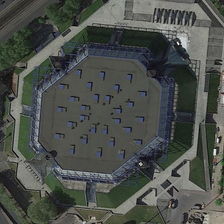

In [36]:
print(train_captions[5])
Image.open(img_name_vector[5])

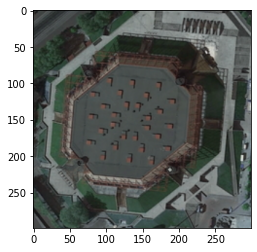

In [37]:
plt.imshow(cv2.resize(cv2.imread(img_name_vector[5]),(299,299)))

In [38]:
for i in img_name_vector[:5]:
  print(cv2.imread(i).shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [39]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = tf.cast(img, tf.float32)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [40]:
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                input_shape=(224, 224, 3),
                                                weights='imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [41]:
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

In [42]:
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [43]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

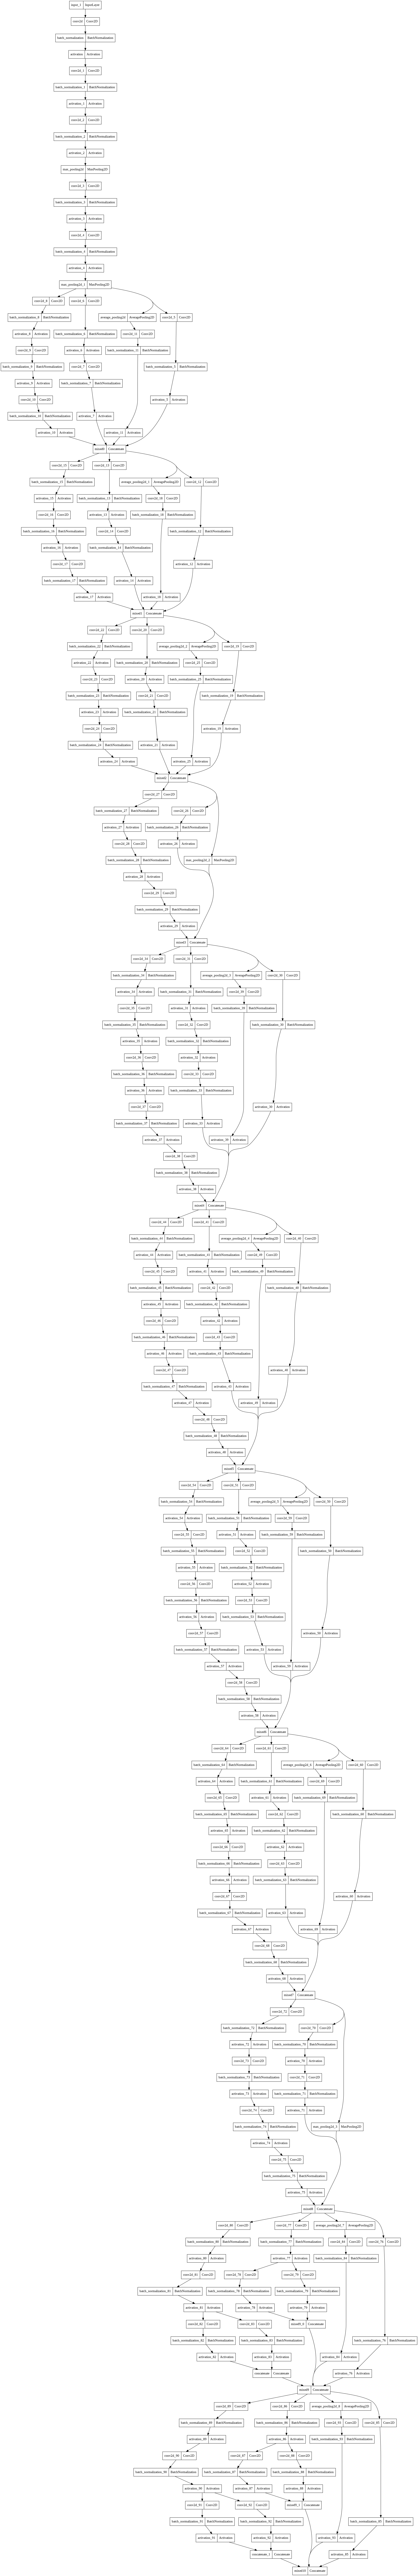

In [44]:
tf.keras.utils.plot_model(image_features_extract_model, to_file='inception_V3_model.png')

In [45]:
new_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [46]:
hidden_layer

<KerasTensor: shape=(None, 5, 5, 2048) dtype=float32 (created by layer 'mixed10')>

In [47]:
image_model.layers[-1]

In [48]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
from tqdm import tqdm

In [50]:
img_name_vector[:2]

['./drive/MyDrive/RSICD/RSICD_images/airport_41.jpg',
 './drive/MyDrive/RSICD/RSICD_images/airport_41.jpg']

In [51]:
encode_train = sorted(set(img_name_vector))

In [52]:
encode_train[:2]

['./drive/MyDrive/RSICD/RSICD_images/00001.jpg',
 './drive/MyDrive/RSICD/RSICD_images/00002.jpg']

In [53]:
len(encode_train)

10921

In [54]:
img_1, path_1 = load_image(encode_train[0])

In [55]:
path_1

'./drive/MyDrive/RSICD/RSICD_images/00001.jpg'

In [56]:
img_1.shape

TensorShape([224, 224, 3])

In [57]:
img_1 = np.array(img_1).reshape((1,224,224,3))

In [58]:
image_features_extract_model(img_1)

<tf.Tensor: shape=(1, 5, 5, 2048), dtype=float32, numpy=
array([[[[1.0318513 , 0.        , 0.01716588, ..., 0.        ,
          0.4029354 , 0.98071563],
         [0.74160016, 0.        , 0.        , ..., 0.11929101,
          0.4239515 , 0.9613393 ],
         [0.88411605, 0.        , 0.        , ..., 0.51156443,
          0.49423322, 0.7946855 ],
         [0.9692315 , 0.        , 0.        , ..., 0.4426596 ,
          0.1332174 , 0.9491314 ],
         [1.1054809 , 0.        , 0.        , ..., 0.26682878,
          0.        , 0.9624049 ]],

        [[1.2693144 , 0.        , 0.07921972, ..., 0.        ,
          0.1226171 , 0.9726854 ],
         [0.2202066 , 0.        , 0.        , ..., 0.18587126,
          0.16381371, 0.8455714 ],
         [0.0536512 , 0.        , 0.        , ..., 0.554763  ,
          0.229171  , 0.8856784 ],
         [0.6026281 , 0.        , 0.        , ..., 0.46652824,
          0.        , 1.0362281 ],
         [0.2311315 , 0.        , 0.        , ..., 0.164073

In [59]:
img_1.shape

(1, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


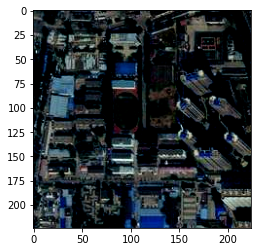

In [60]:
plt.imshow(img_1.reshape((224,224,3)))

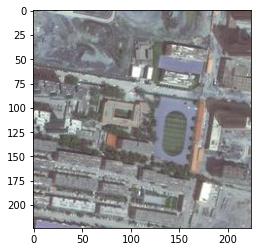

In [61]:
plt.imshow(cv2.imread(encode_train[1]))

In [62]:
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(16)

In [63]:
image_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [64]:
image_features_extract_model(img_1)

<tf.Tensor: shape=(1, 5, 5, 2048), dtype=float32, numpy=
array([[[[1.0318513 , 0.        , 0.01716588, ..., 0.        ,
          0.4029354 , 0.98071563],
         [0.74160016, 0.        , 0.        , ..., 0.11929101,
          0.4239515 , 0.9613393 ],
         [0.88411605, 0.        , 0.        , ..., 0.51156443,
          0.49423322, 0.7946855 ],
         [0.9692315 , 0.        , 0.        , ..., 0.4426596 ,
          0.1332174 , 0.9491314 ],
         [1.1054809 , 0.        , 0.        , ..., 0.26682878,
          0.        , 0.9624049 ]],

        [[1.2693144 , 0.        , 0.07921972, ..., 0.        ,
          0.1226171 , 0.9726854 ],
         [0.2202066 , 0.        , 0.        , ..., 0.18587126,
          0.16381371, 0.8455714 ],
         [0.0536512 , 0.        , 0.        , ..., 0.554763  ,
          0.229171  , 0.8856784 ],
         [0.6026281 , 0.        , 0.        , ..., 0.46652824,
          0.        , 1.0362281 ],
         [0.2311315 , 0.        , 0.        , ..., 0.164073

In [65]:
len(image_dataset)

683

In [66]:
i=0
for img,path in image_dataset:
  i=i+1
  path_1 = path
  print(path)
  if(i>0):
      break

tf.Tensor(
[b'./drive/MyDrive/RSICD/RSICD_images/00001.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00002.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00003.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00004.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00005.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00006.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00007.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00008.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00009.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00010.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00011.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00012.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00013.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00014.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00015.jpg'
 b'./drive/MyDrive/RSICD/RSICD_images/00016.jpg'], shape=(16,), dtype=string)


In [67]:
path_1[1]

<tf.Tensor: shape=(), dtype=string, numpy=b'./drive/MyDrive/RSICD/RSICD_images/00002.jpg'>

In [68]:
for img, path in image_dataset:
  batch_features = image_features_extract_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

In [69]:
#batch_features.shape

In [70]:
#len(batch_features)

In [71]:
#bf.shape

In [72]:
#p

In [73]:
#path

In [74]:
caption_dataset = tf.data.Dataset.from_tensor_slices(train_captions)

In [75]:
train_captions[:2]

['<start> high speed public next to a large airport . <end>',
 '<start> many houses were built near the airport . <end>']

In [76]:
caption_dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [77]:
len(caption_dataset), len(train_captions)

(54605, 54605)

In [78]:
def standardize(inputs):
  inputs = tf.strings.lower(inputs)
  return tf.strings.regex_replace(inputs,r"!\"#$%&\(\)\*\+.,-/:;=?@\[\\\]^_`{|}~", "")

In [79]:
max_length = 50
vocabulary_size = 5000

tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize=standardize,
    output_sequence_length=max_length)

In [80]:
tokenizer.adapt(caption_dataset)

In [81]:
caption_dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [82]:
cap_vector = caption_dataset.map(lambda x: tokenizer(x))

In [83]:
len(cap_vector)

54605

In [84]:
len(tokenizer.get_vocabulary())

3329

In [85]:
word_to_index = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary())
index_to_word = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary(),
    invert=True)

In [86]:
word_to_index('the')

<tf.Tensor: shape=(), dtype=int64, numpy=10>

In [87]:
index_to_word(10)

<tf.Tensor: shape=(), dtype=string, numpy=b'the'>

In [88]:
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(img_name_vector, cap_vector):
  img_to_cap_vector[img].append(cap)

# Create training and validation sets using an 80-20 split randomly.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
  capt_len = len(img_to_cap_vector[imgt])
  img_name_train.extend([imgt] * capt_len)
  cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
  capv_len = len(img_to_cap_vector[imgv])
  img_name_val.extend([imgv] * capv_len)
  cap_val.extend(img_to_cap_vector[imgv])

In [89]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(43680, 43680, 10925, 10925)

In [90]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
num_steps = len(img_name_train) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 25

In [91]:
def map_func(img_name, cap):
  img_tensor = np.load(img_name.decode('utf-8')+'.npy',allow_pickle=True, fix_imports=True,encoding='latin1')
  return img_tensor, cap

In [92]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int64]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [93]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # attention_hidden_layer shape == (batch_size, 64, units)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))

    # score shape == (batch_size, 64, 1)
    # This gives you an unnormalized score for each image feature.
    score = self.V(attention_hidden_layer)

    # attention_weights shape == (batch_size, 64, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [94]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [95]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    # defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
    x = self.fc2(x)

    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [96]:
'''tf.debugging.set_log_device_placement(True)
gpus = tf.config.list_logical_devices('GPU')
gpu_strategy = tf.distribute.MirroredStrategy(gpus)'''

"tf.debugging.set_log_device_placement(True)\ngpus = tf.config.list_logical_devices('GPU')\ngpu_strategy = tf.distribute.MirroredStrategy(gpus)"

In [97]:
#with gpu_strategy.scope():
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, tokenizer.vocabulary_size())

In [98]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [99]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer=optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [100]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  # restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

In [101]:
loss_plot = []

In [102]:
@tf.function
def train_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([word_to_index('<start>')] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)

      for i in range(1, target.shape[1]):
          # passing the features through the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)

  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss

In [103]:
EPOCHS = 10

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy()/int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print(f'Epoch {epoch+1} Loss {total_loss/num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time()-start:.2f} sec\n')

Epoch 1 Batch 0 Loss 1.9329
Epoch 1 Batch 100 Loss 0.7452
Epoch 1 Batch 200 Loss 0.5779
Epoch 1 Batch 300 Loss 0.5719
Epoch 1 Batch 400 Loss 0.4273
Epoch 1 Batch 500 Loss 0.4832
Epoch 1 Batch 600 Loss 0.5162
Epoch 1 Loss 0.629578
Time taken for 1 epoch 2482.12 sec

Epoch 2 Batch 0 Loss 0.4817
Epoch 2 Batch 100 Loss 0.4233
Epoch 2 Batch 200 Loss 0.4938
Epoch 2 Batch 300 Loss 0.4751
Epoch 2 Batch 400 Loss 0.5128
Epoch 2 Batch 500 Loss 0.4424
Epoch 2 Batch 600 Loss 0.3055
Epoch 2 Loss 0.429443
Time taken for 1 epoch 2361.24 sec

Epoch 3 Batch 0 Loss 0.4873
Epoch 3 Batch 100 Loss 0.3504
Epoch 3 Batch 200 Loss 0.3836
Epoch 3 Batch 300 Loss 0.3541
Epoch 3 Batch 400 Loss 0.3955
Epoch 3 Batch 500 Loss 0.4437
Epoch 3 Batch 600 Loss 0.2713
Epoch 3 Loss 0.371149
Time taken for 1 epoch 2348.19 sec

Epoch 4 Batch 0 Loss 0.3928
Epoch 4 Batch 100 Loss 0.3094
Epoch 4 Batch 200 Loss 0.2419
Epoch 4 Batch 300 Loss 0.3253
Epoch 4 Batch 400 Loss 0.2691
Epoch 4 Batch 500 Loss 0.2711
Epoch 4 Batch 600 Loss 0

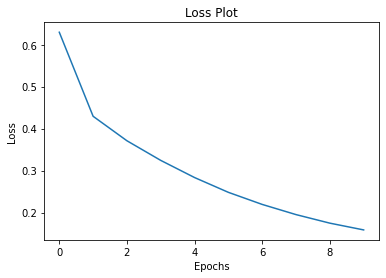

In [104]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [135]:
def evaluate(image):
    attention_plot = np.zeros((max_length, 25))
    #print(attention_plot.shape)

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0],
                                                 -1,
                                                 img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([word_to_index('<start>')], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        predicted_word = tf.compat.as_text(index_to_word(predicted_id).numpy())
        result.append(predicted_word)

        if predicted_word == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [136]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for i in range(len_result):
        temp_att = np.resize(attention_plot[i], (8, 8))
        grid_size = max(int(np.ceil(len_result/2)), 2)
        ax = fig.add_subplot(grid_size, grid_size, i+1)
        ax.set_title(result[i])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

Real Caption: <start> many green plants and some buildings are near a viaduct with many cars . <end>
Prediction Caption: some green plants are near a viaduct . <end>


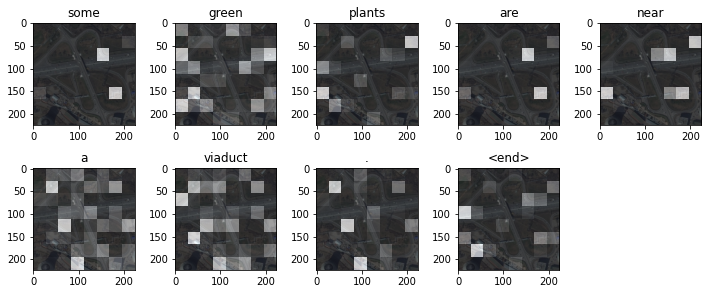

In [137]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tf.compat.as_text(index_to_word(i).numpy())
                         for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

Real Caption: <start> a piece of sand in the desert is like fish scale . <end>
Prediction Caption: many ripples are in a piece of yellow desert . <end>


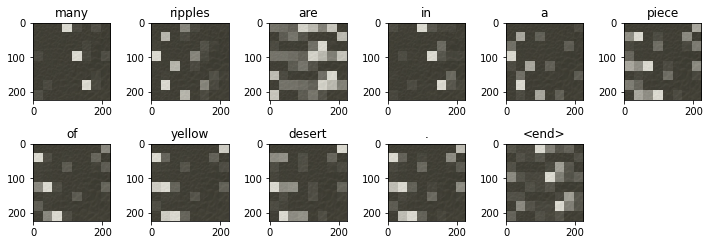

In [138]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tf.compat.as_text(index_to_word(i).numpy())
                         for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

Real Caption: <start> some buildings and many green meadows are near a viaduct . <end>
Prediction Caption: some green trees and some green trees are near a viaduct . <end>


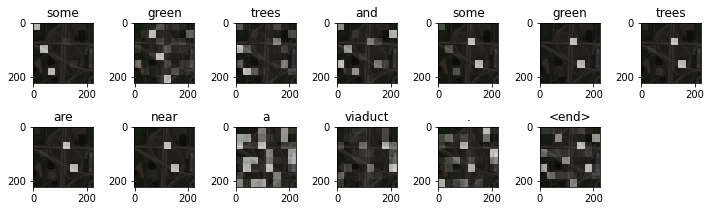

In [140]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tf.compat.as_text(index_to_word(i).numpy())
                         for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

Real Caption: <start> the commercial which has several buildings with light white top is in a fanshaped district . <end>
Prediction Caption: many buildings and green trees are around a terminal in a dense residential area . <end>


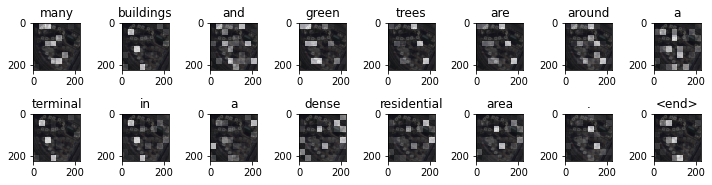

In [141]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tf.compat.as_text(index_to_word(i).numpy())
                         for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

Real Caption: <start> the irregular pond contains dark green water and is surrounded by a row of trees and crowded houses . <end>
Prediction Caption: many green trees and many green trees are around a pond with several ponds . <end>


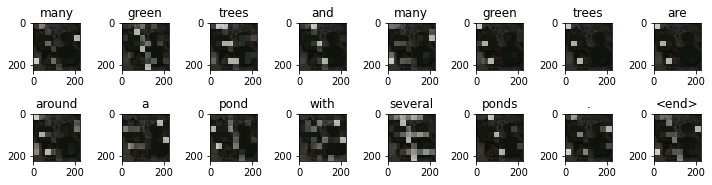

In [142]:
# captions on the validation set
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tf.compat.as_text(index_to_word(i).numpy())
                         for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)

In [143]:
encoder.save_weights("encoder.h5")
decoder.save_weights("decoder.h5")